In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
from trott import *
from qiskit import IBMQ
from qiskit.providers.aer import QasmSimulator
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Prepare Circuits

In [12]:
trott_gate = gen_trott_gate() # using the basic trott method (this can be changed)x
trott_steps_range = np.arange(4,25,1)
qcs = gen_st_qcs_range(trott_gate, trott_steps_range)

In [11]:
qcs[10][-2].draw() # e.g. 10 trott steps, example tomo circuit

»
q60_0: ─────────────────────────────────────────────────────────────────»
            ┌─────────────┐┌─────────────┐┌─────────────┐┌─────────────┐»
q60_1: ─────┤0            ├┤0            ├┤0            ├┤0            ├»
            │             ││             ││             ││             │»
q60_2: ─────┤             ├┤             ├┤             ├┤             ├»
       ┌───┐│             ││             ││             ││             │»
q60_3: ┤ X ├┤1 Trot(π/10) ├┤1 Trot(π/10) ├┤1 Trot(π/10) ├┤1 Trot(π/10) ├»
       └───┘│             ││             ││             ││             │»
q60_4: ─────┤             ├┤             ├┤             ├┤             ├»
       ┌───┐│             ││             ││             ││             │»
q60_5: ┤ X ├┤2            ├┤2            ├┤2            ├┤2            ├»
       └───┘└─────────────┘└─────────────┘└─────────────┘└─────────────┘»
q60_6: ─────────────────────────────────────────────────────────────────»
                                                                        »
c48: 3/═════════════════════════════════════════════════════════════════»
                                                                        »
«                                                                   »
«q60_0: ────────────────────────────────────────────────────────────»
«       ┌─────────────┐┌─────────────┐┌─────────────┐┌─────────────┐»
«q60_1: ┤0            ├┤0            ├┤0            ├┤0            ├»
«       │             ││             ││             ││             │»
«q60_2: ┤             ├┤             ├┤             ├┤             ├»
«       │             ││             ││             ││             │»
«q60_3: ┤1 Trot(π/10) ├┤1 Trot(π/10) ├┤1 Trot(π/10) ├┤1 Trot(π/10) ├»
«       │             ││             ││             ││             │»
«q60_4: ┤             ├┤             ├┤             ├┤             ├»
«       │             ││             ││             ││             │»
«q60_5: ┤2            ├┤2            ├┤2            ├┤2            ├»
«       └─────────────┘└─────────────┘└─────────────┘└─────────────┘»
«q60_6: ────────────────────────────────────────────────────────────»
«                                                                   »
«c48: 3/════════════════════════════════════════════════════════════»
«                                                                   »
«                                      ░                      
«q60_0: ───────────────────────────────░──────────────────────
«       ┌─────────────┐┌─────────────┐ ░ ┌─┐                  
«q60_1: ┤0            ├┤0            ├─░─┤M├──────────────────
«       │             ││             │ ░ └╥┘                  
«q60_2: ┤             ├┤             ├─░──╫───────────────────
«       │             ││             │ ░  ║ ┌─┐               
«q60_3: ┤1 Trot(π/10) ├┤1 Trot(π/10) ├─░──╫─┤M├───────────────
«       │             ││             │ ░  ║ └╥┘               
«q60_4: ┤             ├┤             ├─░──╫──╫────────────────
«       │             ││             │ ░  ║  ║ ┌─────┐┌───┐┌─┐
«q60_5: ┤2            ├┤2            ├─░──╫──╫─┤ Sdg ├┤ H ├┤M├
«       └─────────────┘└─────────────┘ ░  ║  ║ └─────┘└───┘└╥┘
«q60_6: ───────────────────────────────░──╫──╫──────────────╫─
«                                      ░  ║  ║              ║ 
«c48: 3/══════════════════════════════════╩══╩══════════════╩═
«                                         0  1              2

# Prepare Backend

In [13]:
# load IBMQ Account data

# IBMQ.save_account(TOKEN)  # replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
provider = IBMQ.load_account()

In [14]:
# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider.get_backend('ibmq_jakarta')
# properties = jakarta.properties()

# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim = QasmSimulator()

# Capture Data

In [15]:
# results = gen_results(qcs, backend=sim_noisy_jakarta, label="data/noise_sim")
results = np.load('data/noise_sim_results_20220414__112011.npy',allow_pickle=True).item()

# Run Analysis

In [16]:
res_analysis = run_analysis(results) 

In [17]:
compare_Z_parity(res_analysis)

 	Expected | n=24
<ZZZ>	1.0	   0.136
<ZZI>	-1.0	   -0.068
<ZIZ>	-1.0	   -0.170
<IZZ>	1.0	   0.040
<ZII>	1.0	   0.089
<IZI>	-1.0	   -0.172
<IIZ>	-1.0	   -0.104


In [18]:
res_analysis["data"][5]["avg_infid"], np.mean(res_analysis["data"][5]["infids"]) # these should match

(0.8269019460215388, 0.8269019460215385)

#### Plots

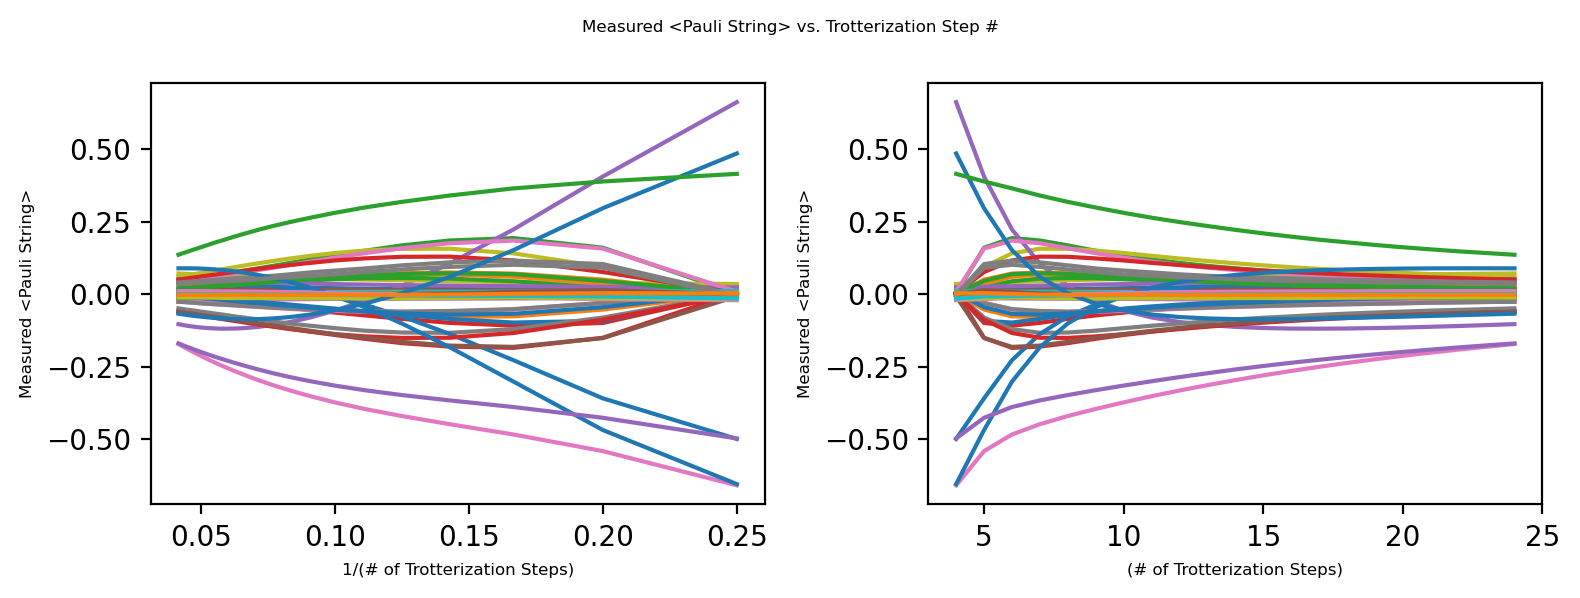

In [19]:
axs = plot_parity(res_analysis)

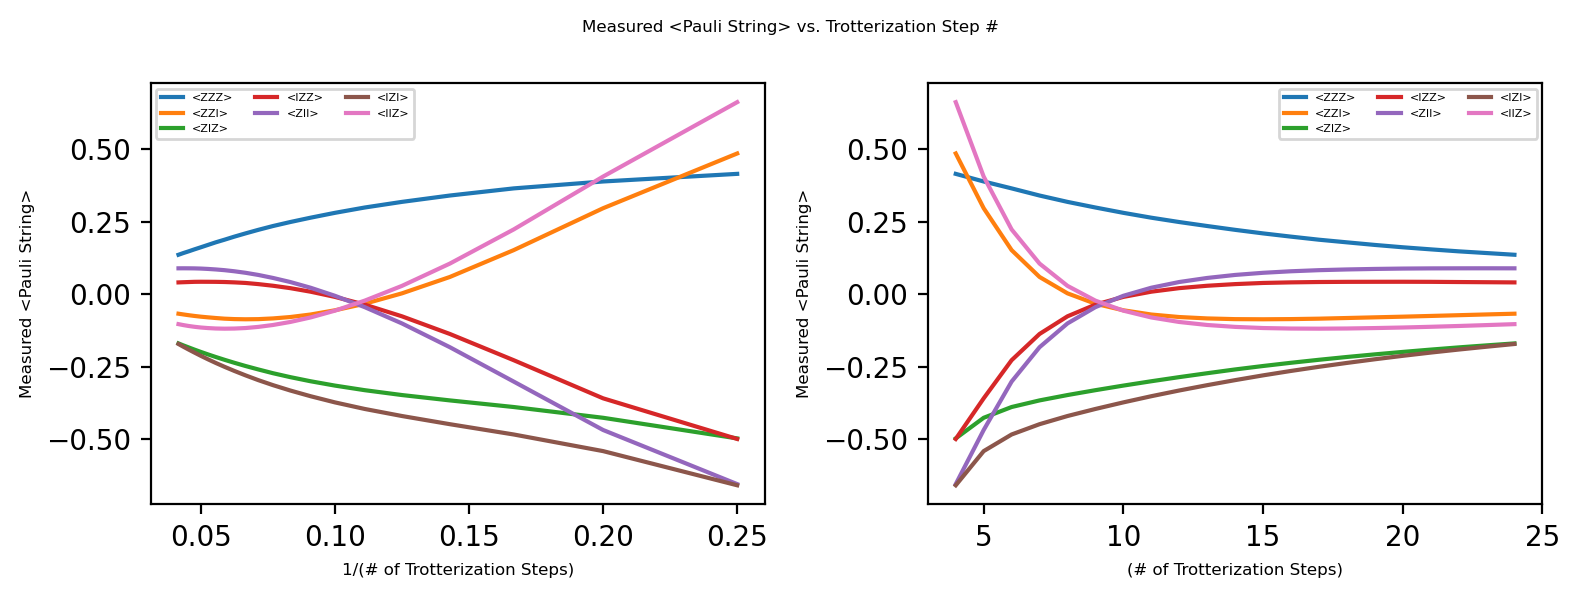

In [11]:
axs = plot_parity(res_analysis, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

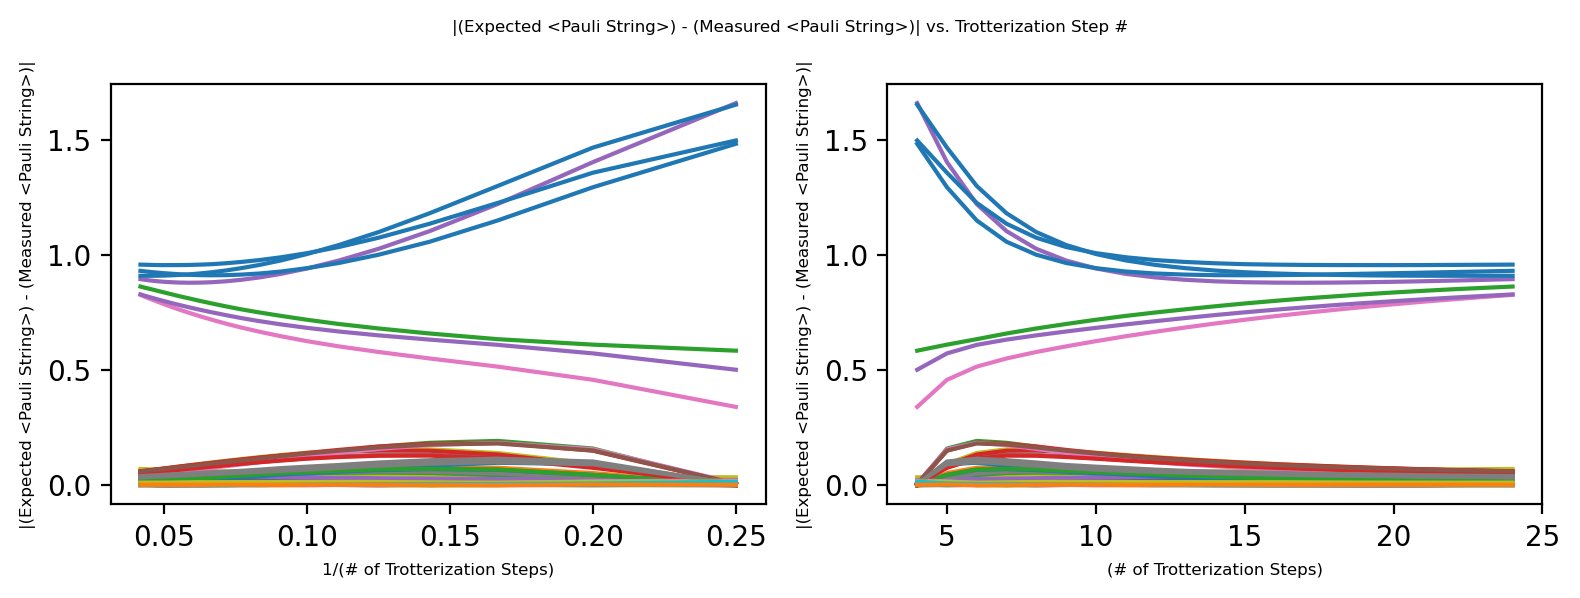

In [12]:
axs = plot_parity_dist(res_analysis)

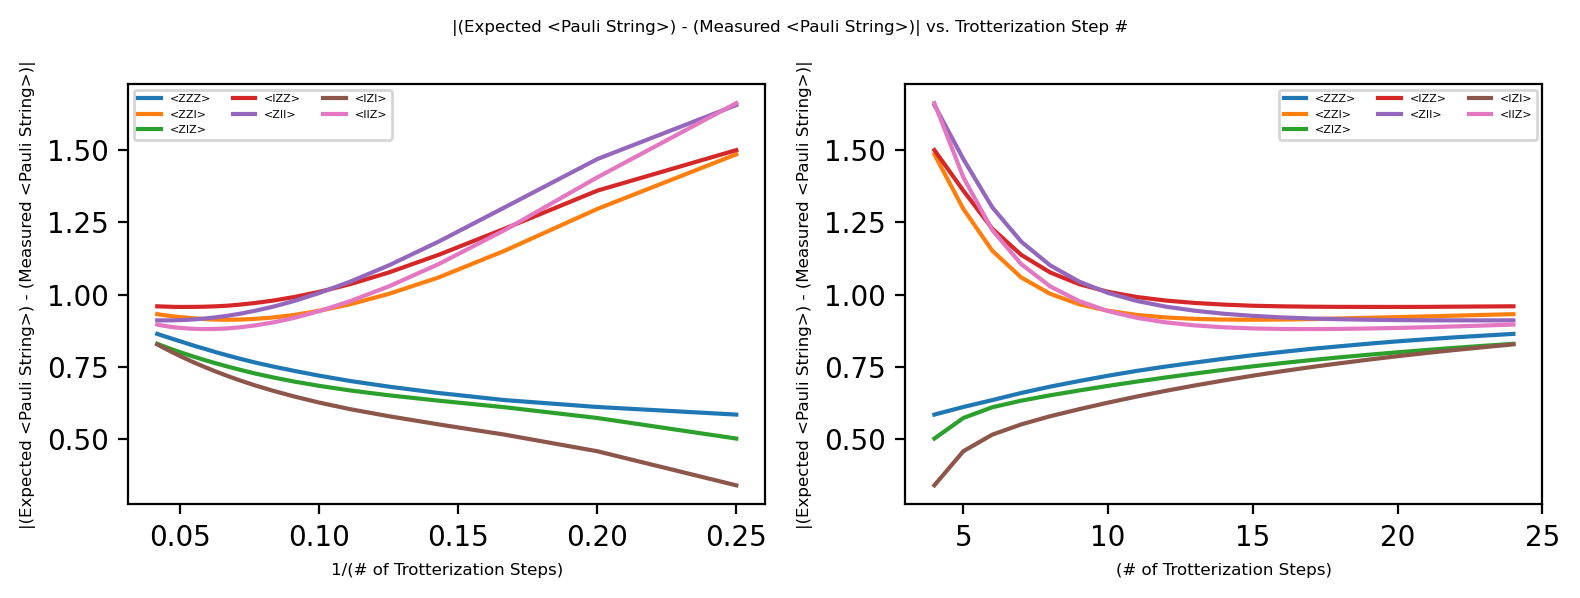

In [13]:
axs = plot_parity_dist(res_analysis, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

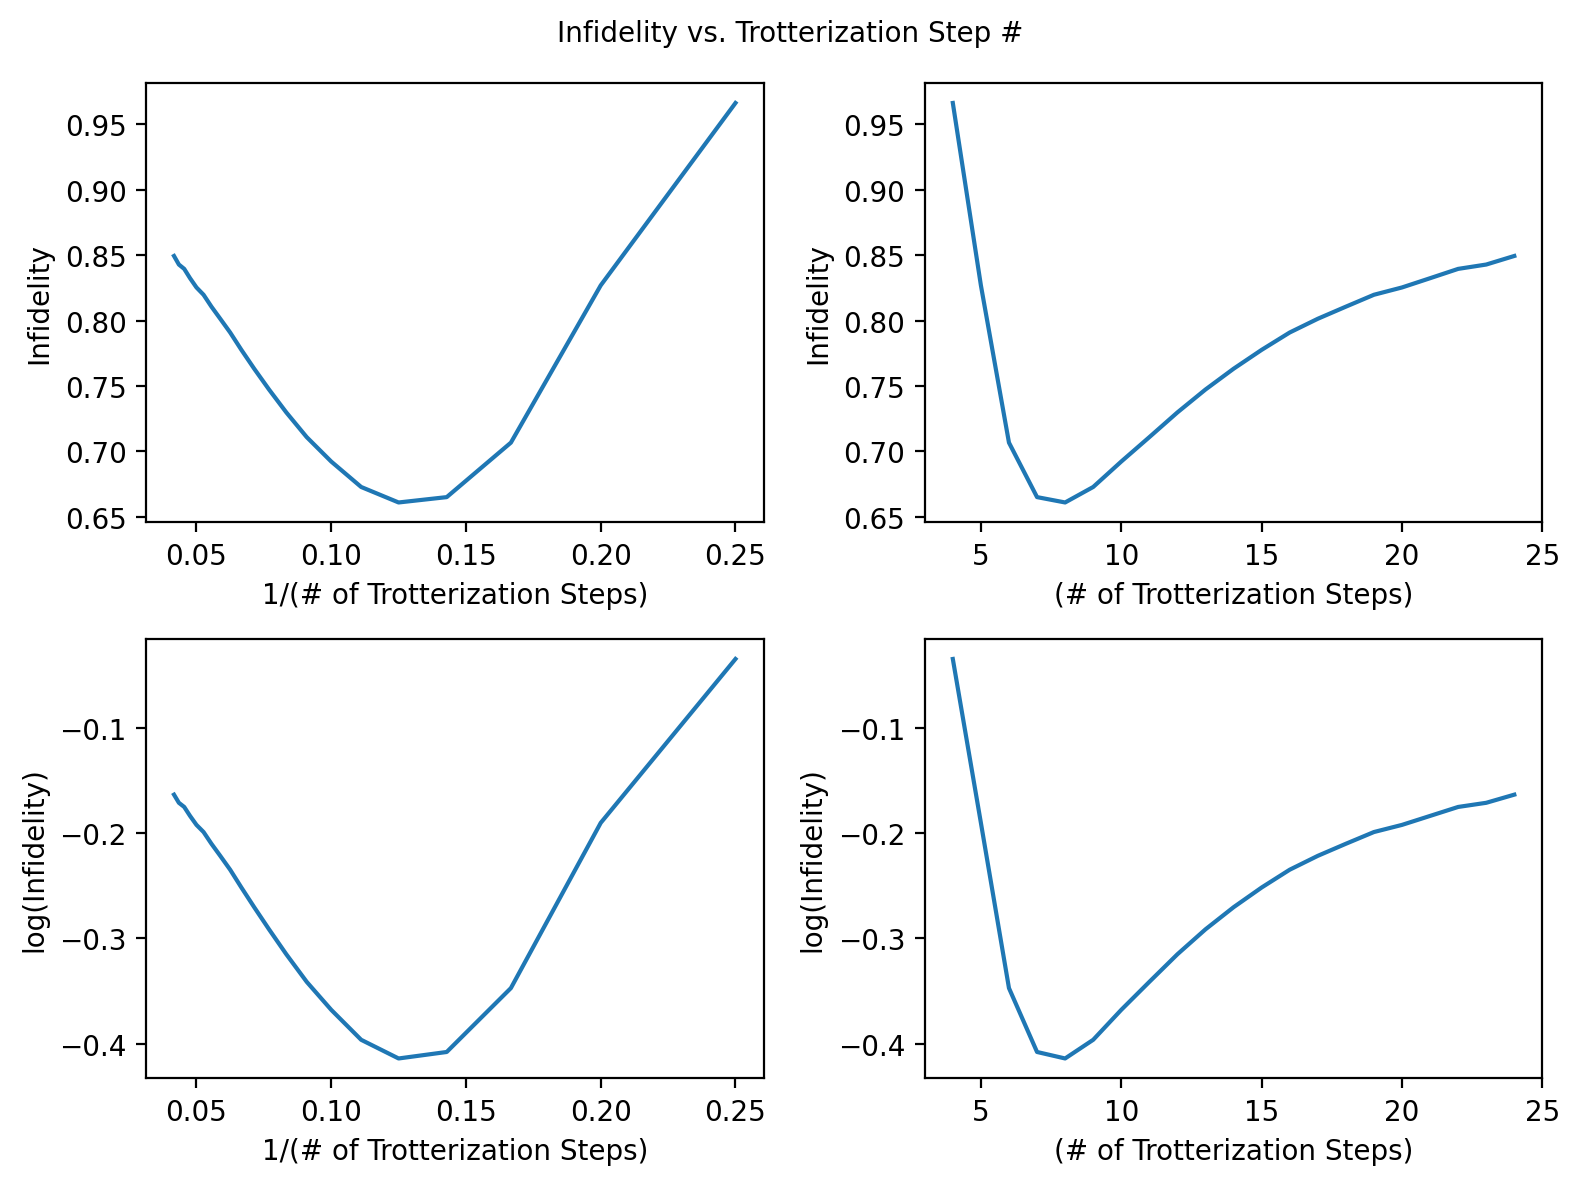

In [14]:
_ = plot_fidelities(res_analysis)

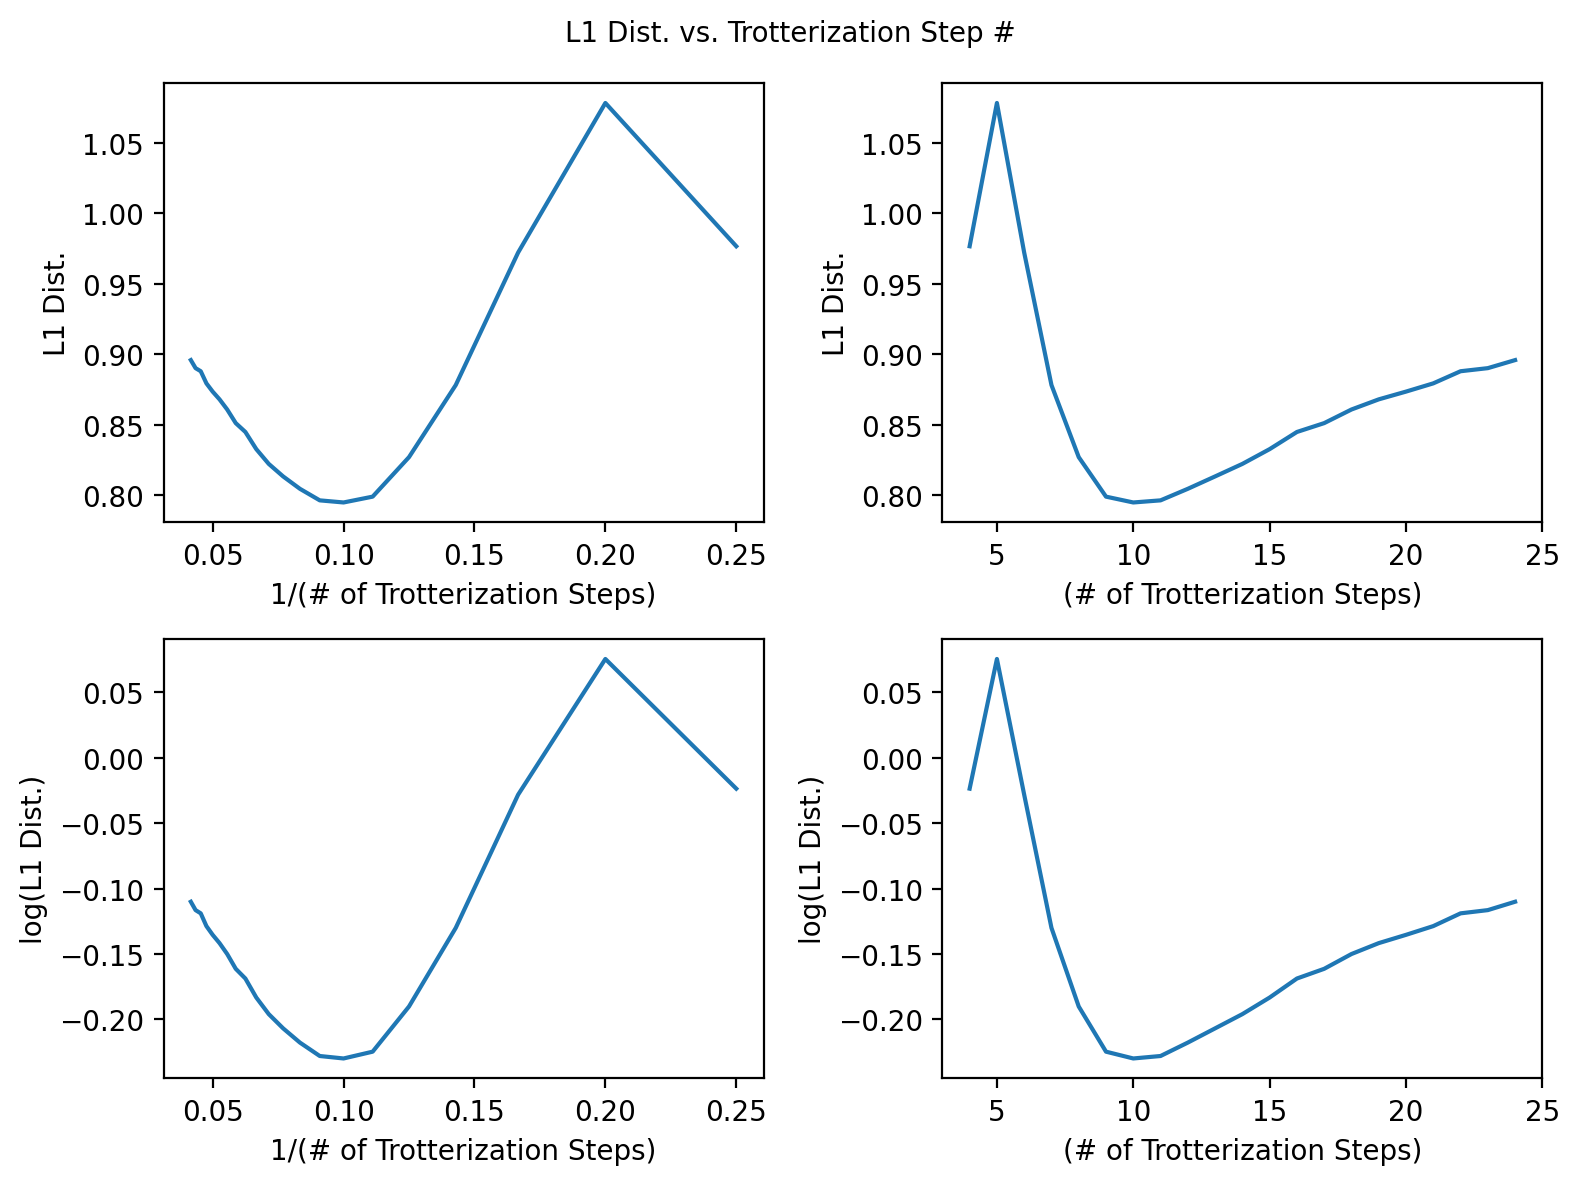

In [15]:
_ = plot_l1_dist(res_analysis)

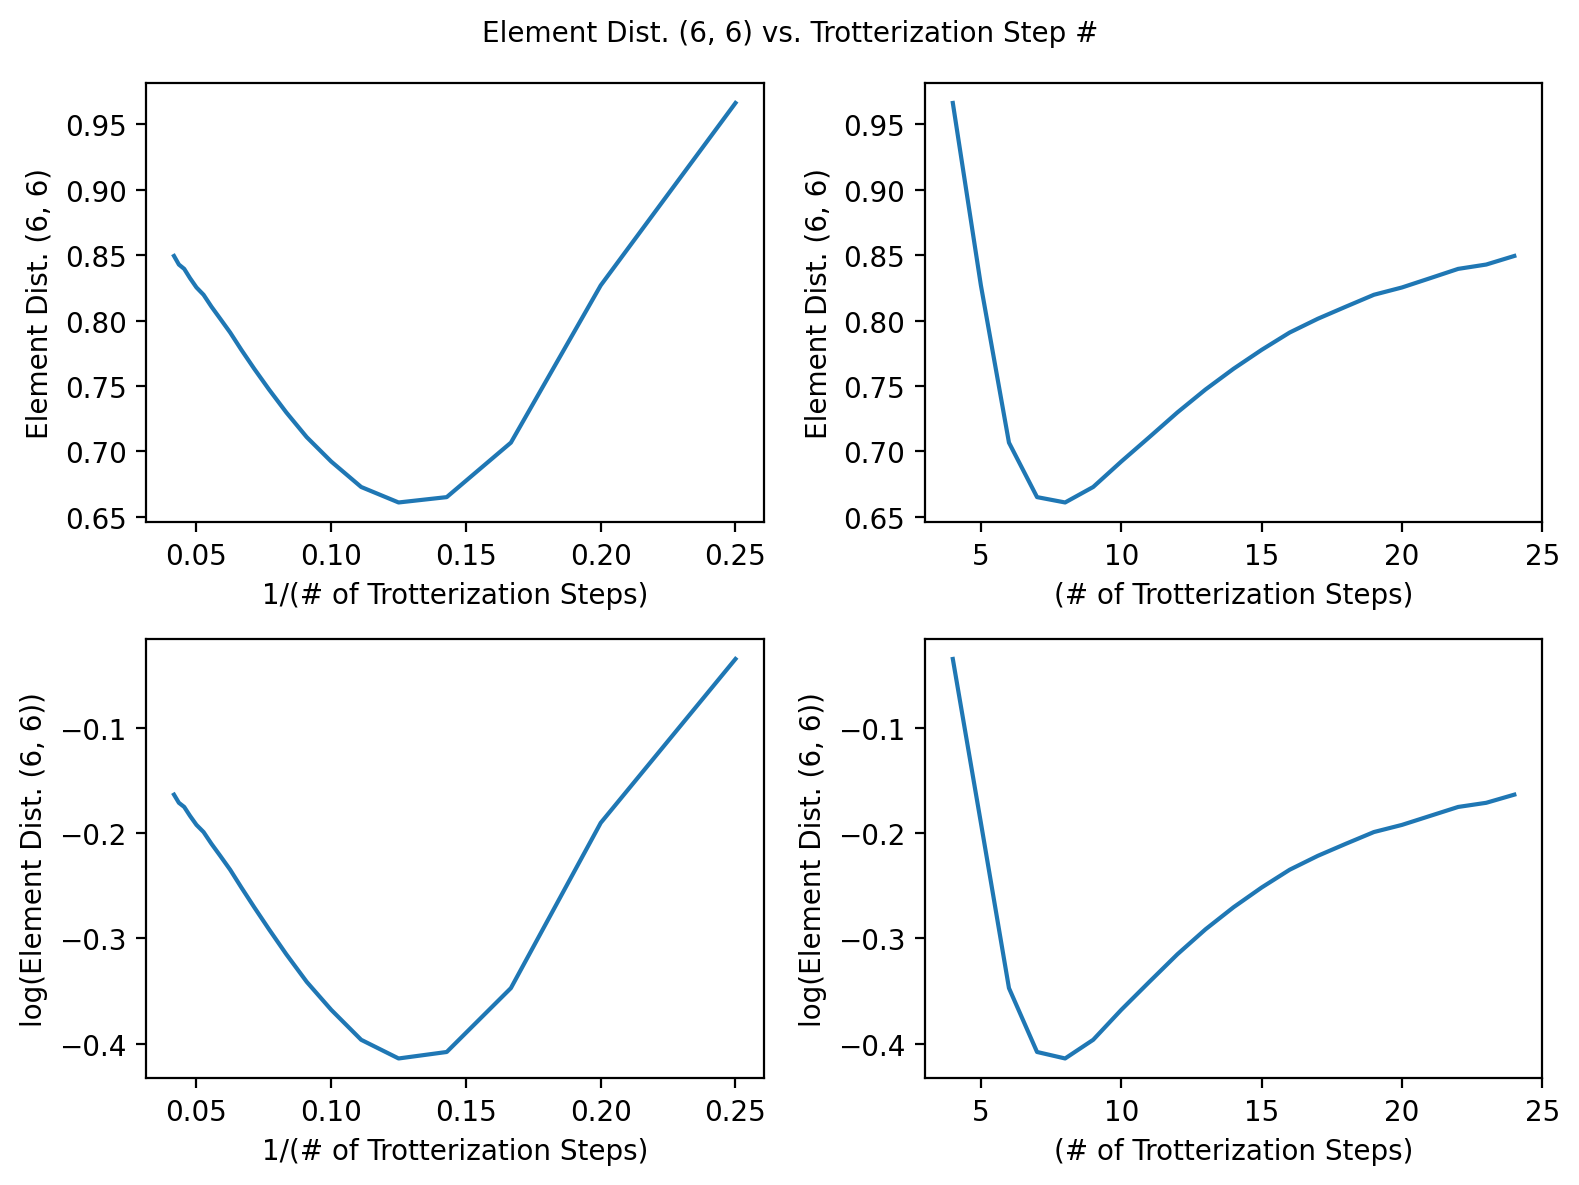

In [16]:
_ = plot_element_dist(res_analysis)

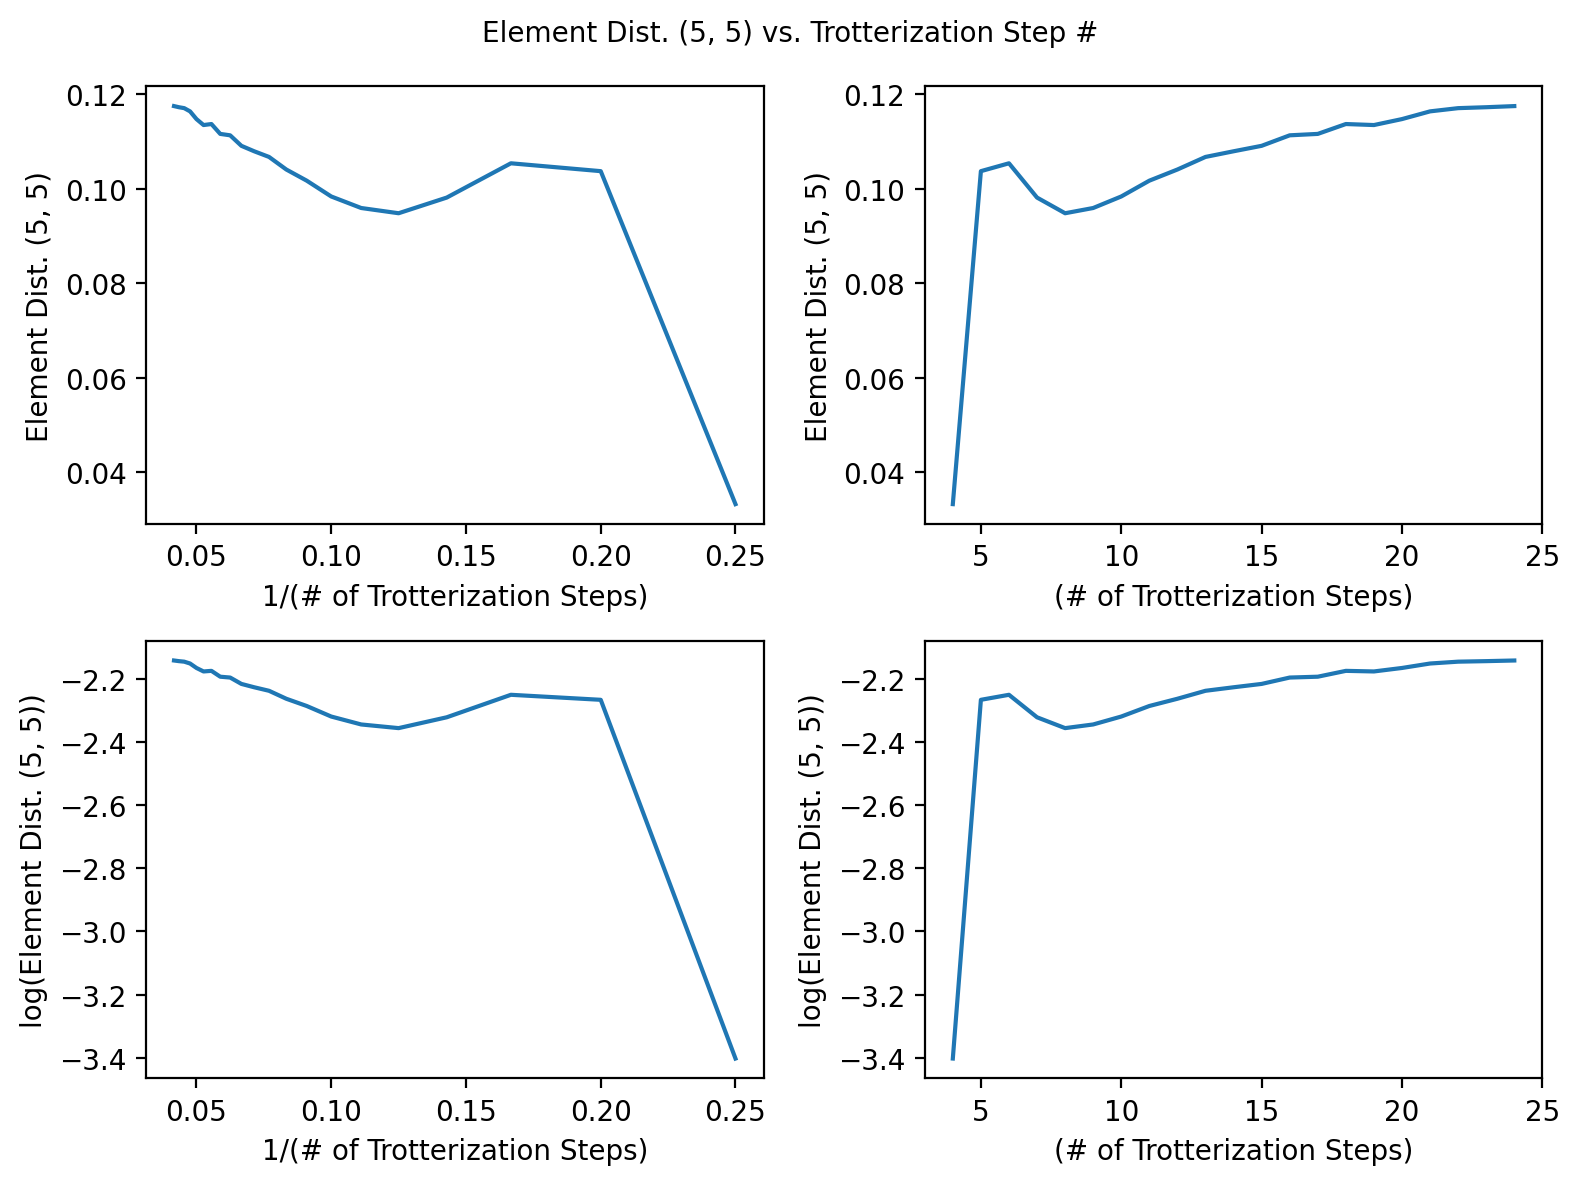

In [17]:
_ = plot_element_dist(res_analysis, row=5, col=5)

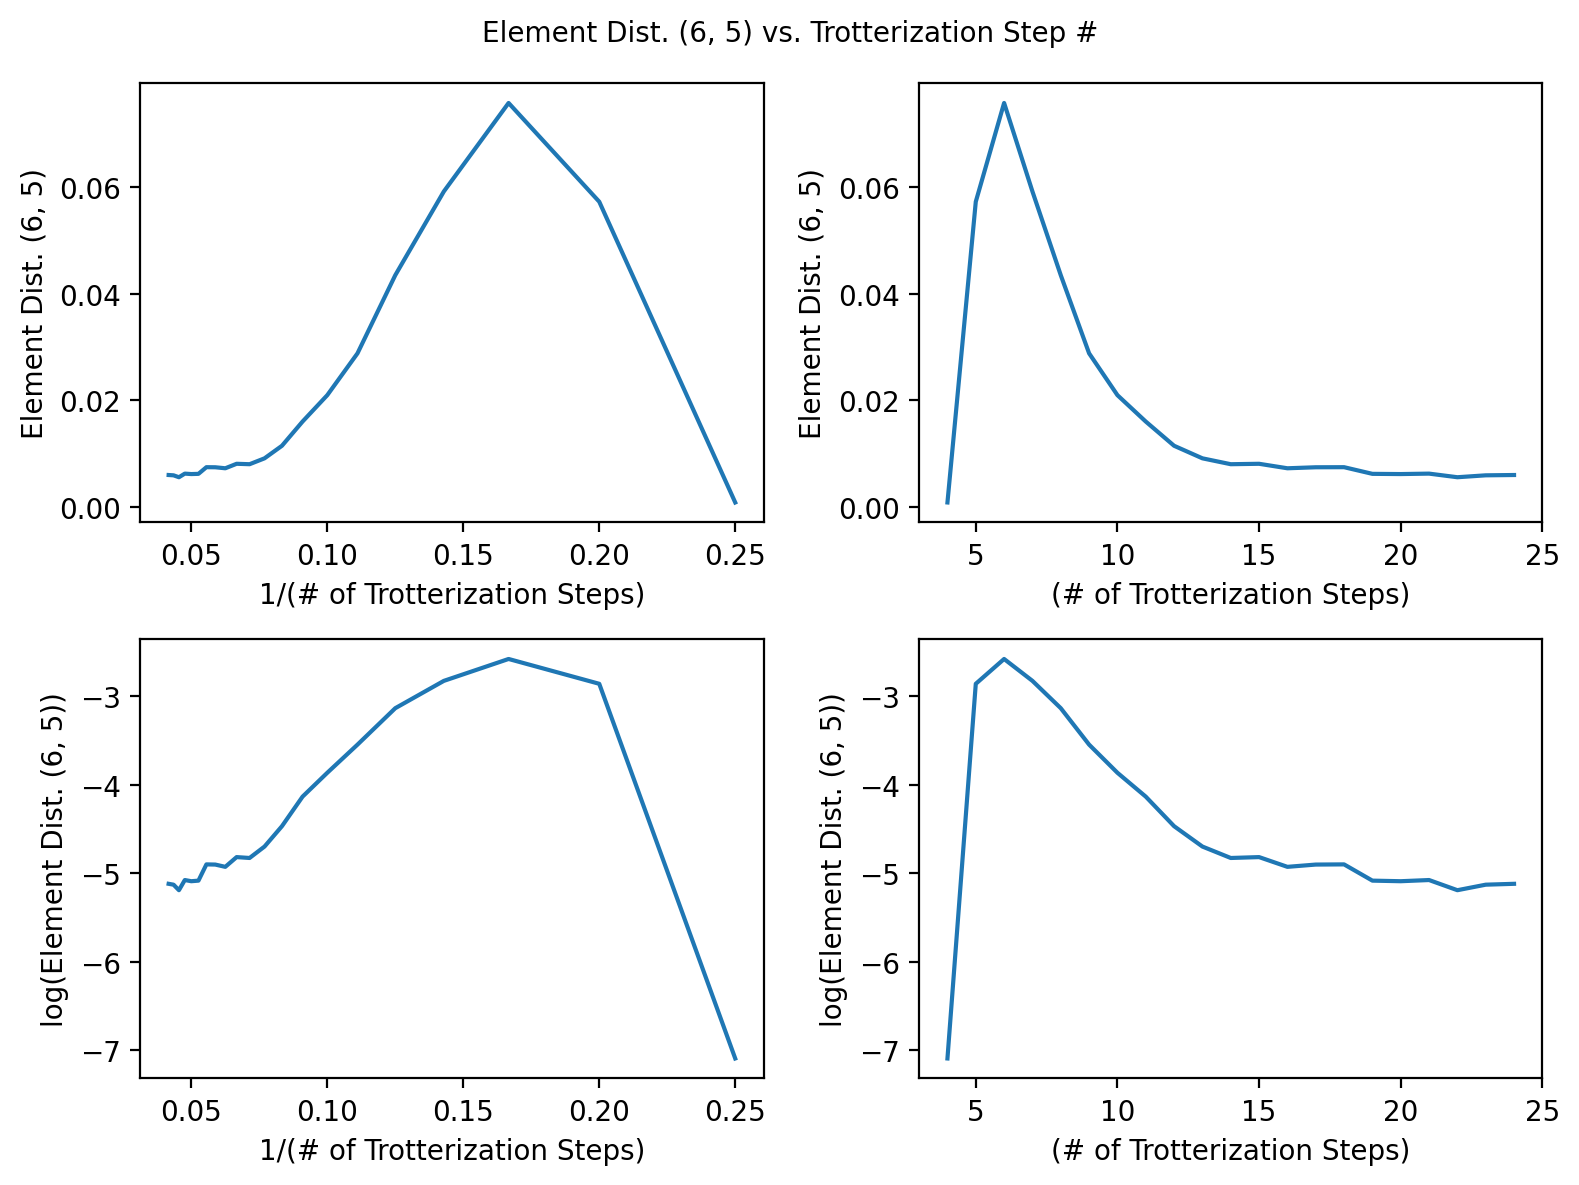

In [18]:
_ = plot_element_dist(res_analysis, row=6, col=5)

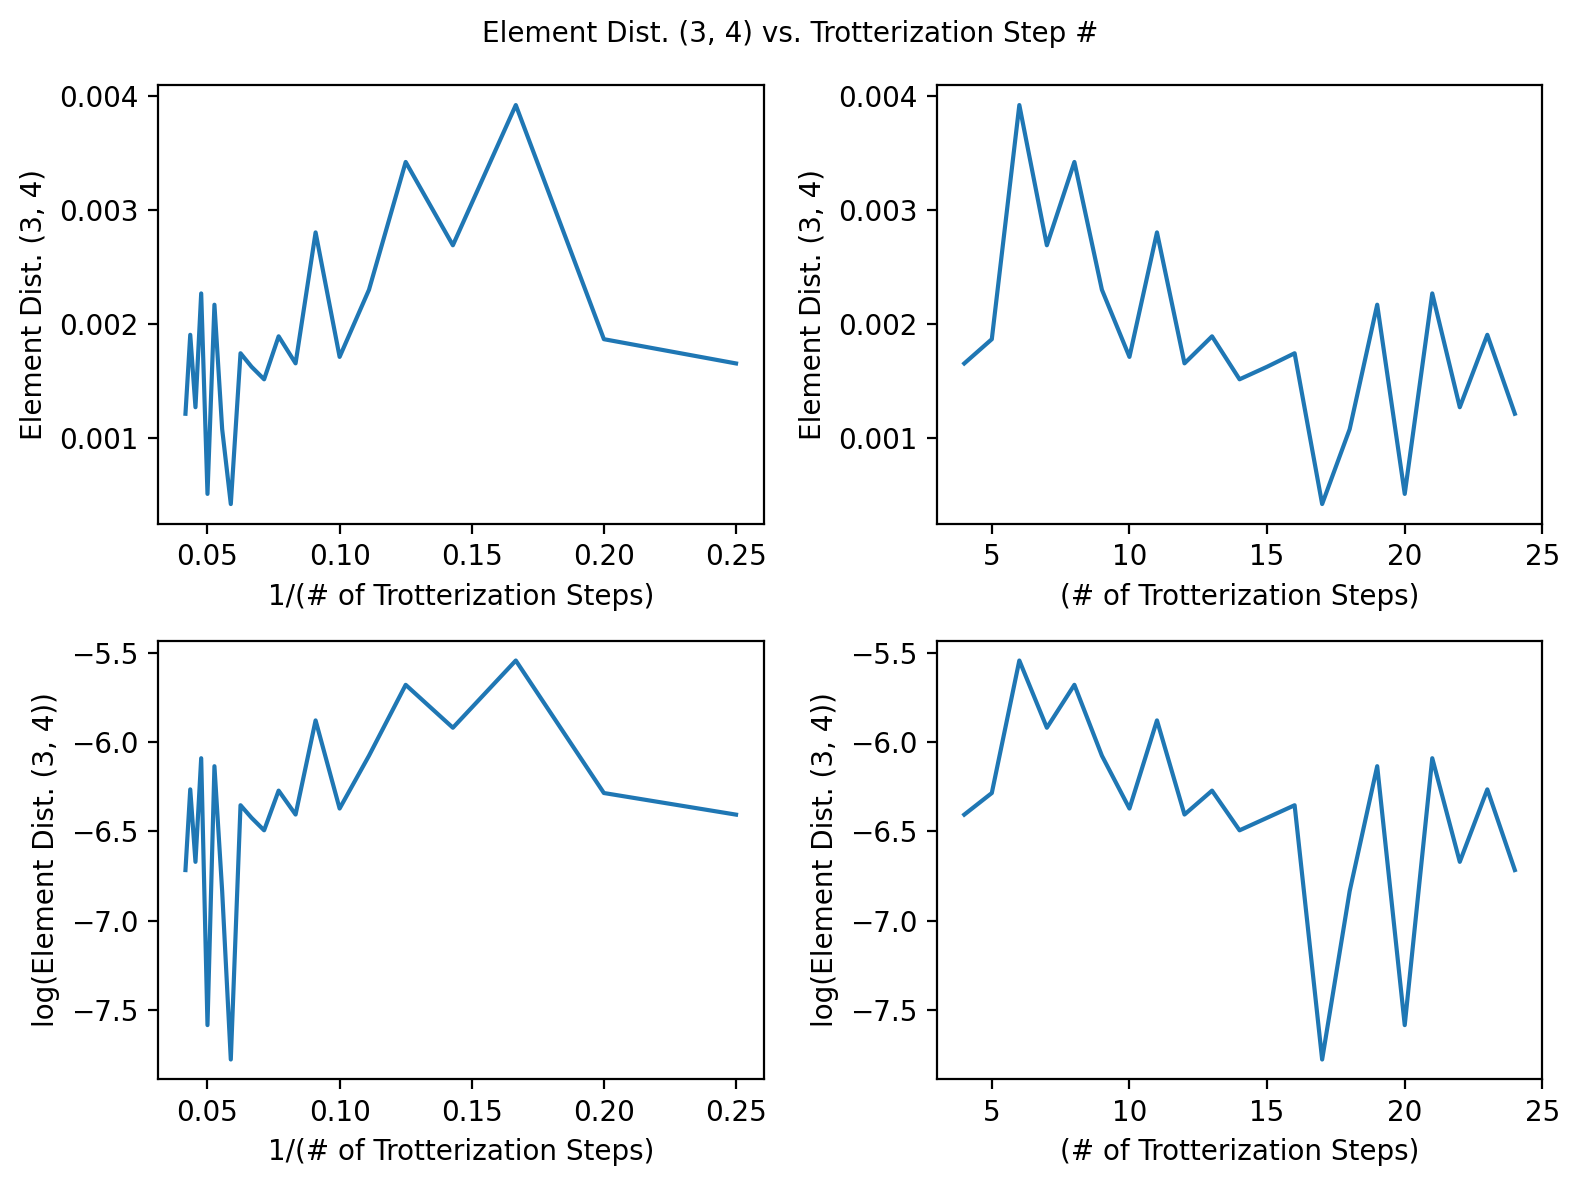

In [19]:
_ = plot_element_dist(res_analysis, row=3, col=4)